<a href="https://colab.research.google.com/github/Kvazzzzar/ML/blob/main/ML_%D0%92%D0%BE%D0%B9%D0%BA%D0%B8%D0%BD_%D0%91%D0%98%D0%9D_22_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Представлены данные по СПО и ВО в  Российской Федерации*

Используйте изученные методы машинного обучения, ответьте на вопросы.

# **1.Задание**

1. Можно ли утверждать, что численность студентов среднего образования статистически значимо зависит от следующих показателей: Средней начисленной заработной платы; Численностью работоспособного населения; Удельный вес занятого населения со средним профессиональным образованием. Выбрать мет од МО, позволяющий ответить на данный вопрос, оценить, модель, обосновать ответ используя статистические показатели. Можно ли использовать показатель "численность населения"?

In [ ]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_excel("paste.xlsx")

# Отбираем нужные переменные
X = df[["Wages", "WorkAge", "SecEdu"]]
y = df["SecStudent"]

# Добавляем константу в модель
X = sm.add_constant(X)

# Обучаем модель множественной линейной регрессии
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             SecStudent   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     2.958
Date:                Tue, 06 May 2025   Prob (F-statistic):             0.0372
Time:                        18:16:59   Log-Likelihood:                -408.76
No. Observations:                  85   AIC:                             825.5
Df Residuals:                      81   BIC:                             835.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        201.0338     26.575      7.565      0.0

Мы видим, что:

Средняя заработная плата оказывает значимое отрицательное влияние на численность студентов СПО (коэффициент = –0.0004, p = 0.011),

Численность работоспособного населения не показала значимого влияния (p = 0.437),

Удельный вес работников со средним образованием также незначим (p = 0.382).

**Вывод:**

Таким образом, только уровень заработной платы статистически значимо влияет на численность студентов среднего профобразования — при её росте число студентов СПО снижается. Остальные переменные влияния не оказывают.

# **2.Задание**

2. Можно ли утверждать, что  города федерального значения отличаются от других регионов РФ? . Выбрать метод МО, позволяющий ответить на данный вопрос, оценить, обосновать ответ . Подсказка: для второго вопроса 3 варианта МО и не менее 4х моделей.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('paste.xlsx')

# Создаем бинарную переменную: 1 — город федерального значения, 0 — остальные
gfz = ['г. Москва', 'г. Санкт-Петербург', 'г. Севастополь']
df['is_gfz'] = df['Region'].isin(gfz).astype(int)

# Выбор признаков
features = ['Wages', 'HighEdu', 'SecEdu', 'SecStudent', 'HighStudent']
X = df[features]
y = df['is_gfz']

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)


 Модель 1: Логистическая регрессия


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)
y_proba = model_logreg.predict_proba(X_test)[:, 1]

print("Логистическая регрессия:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Логистическая регрессия:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         1

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

ROC-AUC: 1.0


Модель 2: Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

print("Дерево решений:")
print(classification_report(y_test, y_pred_tree))


Дерево решений:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         1

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



Модель 3: Случайный лес

Случайный лес:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.00      0.00      0.00         1

    accuracy                           0.94        17
   macro avg       0.47      0.50      0.48        17
weighted avg       0.89      0.94      0.91        17



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


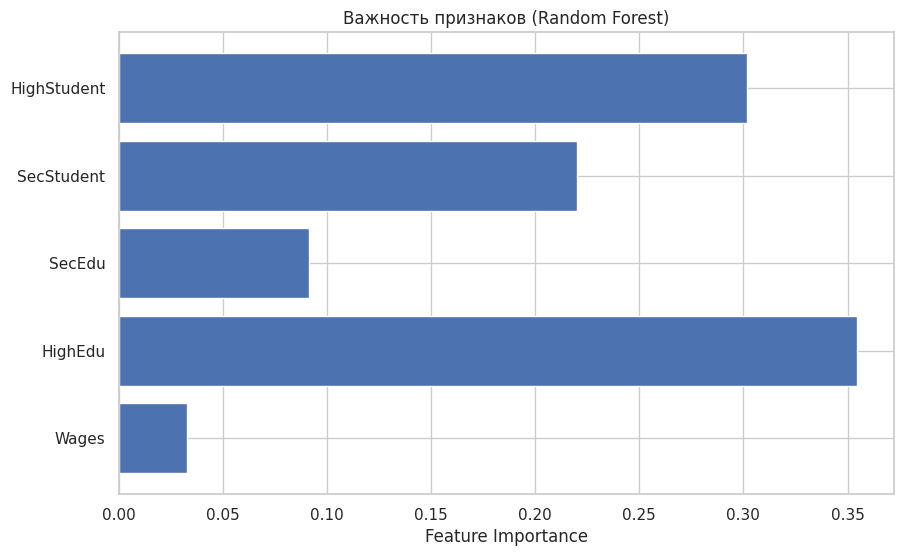

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Случайный лес:")
print(classification_report(y_test, y_pred_rf))

# Важность признаков
import matplotlib.pyplot as plt

importances = model_rf.feature_importances_
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.title('Важность признаков (Random Forest)')
plt.show()


Модель 4: PCA + кластеризация (KMeans)

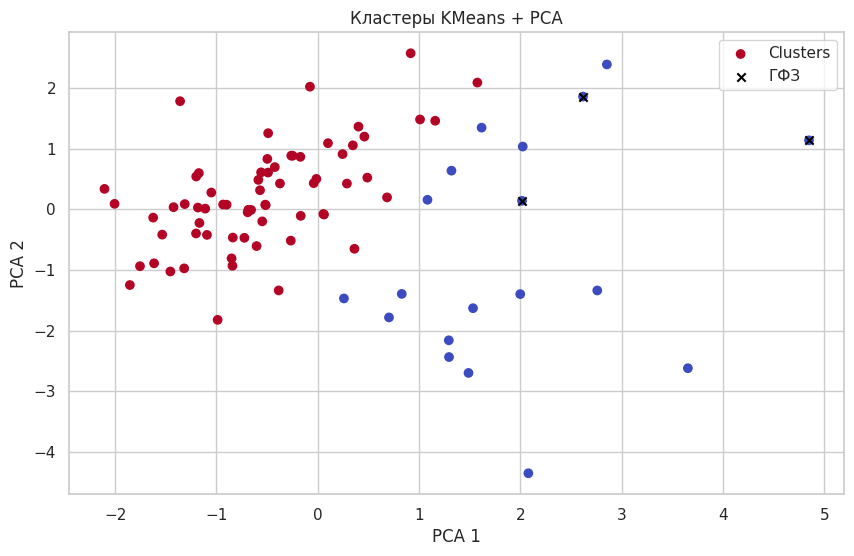

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Кластеризация
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Визуализация
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='coolwarm', label='Clusters')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], marker='x', color='black', label='ГФЗ')
plt.title('Кластеры KMeans + PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()
